# Guide for Data Preprocessing

It's a tutorial guide for the whole process of data analysis, which includes data cleaning, data visualization, data preprocessing, modeling, evaluation.  

Deal with the missing values, outliers, duplicates.  
Then convert the data format, process text data.



# Contents
- Missing Values
    - case1：NFL Play 
- Outliers
    - case2：Star Wars Characters' Height
- Data Scaling and Normalization
- Parsing Data
    - Binning
    - DateTime type
    - Text Data-->Str Processing
    - Character Encodings


# 1. Missing Values

## Case 1：NFL Play

The NFL Play dataframe is about all games from 2009 through 2018 (week 15) 


In [22]:
import pandas as pd, numpy as np
df=pd.read_csv("E:\\Programming\\Dataset_prac\\NFL Play by Play 2009-2016 (v3).csv",low_memory=False)
print(df.shape)

df.head()

(362447, 102)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## 1. Check how many values are missing.
`isnull().sum()` or `isna().sum()`

In [8]:
df.isna().sum().head(10)

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

## 2. Figure out  why the data is missing?
If it is missing because it is not recorded, try to fill the missing data;  
if it is missing because there should not be such data, just drop it.

`dropna(axis=0)` remove the rows(axis=0) or columns(axis=1) contain missing data  
We can see that when removing the cols which contain missing values,the dataframe will only have 41 cols.

In [10]:
df_drop_cols=df.dropna(axis=1)
df_drop_cols.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


- Fill the missing data.  
`.fillna(value, method='string'/'bfill'/'ffill', axis=1, inplace)`  
value is the specified target to replace the missing value, you can use number, string,  
'bfill'(use the next un-missing value), 'ffill'(use the last un-missing value).

In [12]:
# get a subset to print well 
sub_df=df.loc[:,'EPA':'Season'].head()
sub_df

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [15]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
sub_df.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## 3. Imputation
Like mentioned before, drop null or fill null are both usefull ways to impute.  
We can also use some Machine Learning packages to apply imputation.

- <big>An Extension To Imputation</big>  
we can impute the missing values as before(drop or fill), then we create an additional column to describe the missing status(T/F)
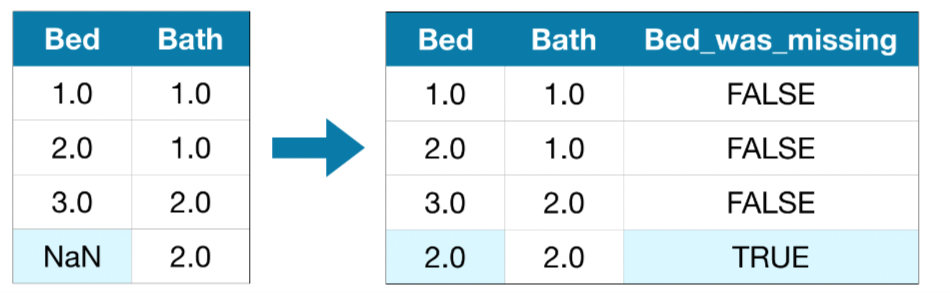


**SimpleImputer** is a sklearn function that replaces missing values with the mean value along each column.
strategy：指定填充缺失值的策略。可选的策略有： 
- "mean"：使用列的平均值来填充缺失值。
- "median"：使用列的中位数来填充缺失值。
- "most_frequent"：使用列中出现最频繁的值来填充缺失值。
- "constant"：使用指定的常数值来填充缺失值。需要同时指定 fill_value 参数。  

 fill_value：仅在 strategy="constant" 时使用，用于指定要用于填充缺失值的常数值。  
 
 注意，impute操作可能使得列名缺失，可以进行如下操作来恢复列名: `imputed_x.columns=ori_x.columns`


In [48]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()
imputed_df=pd.DataFrame(imputer.fit_transform(df[['airEPA']]))

print(df.airEPA.head(),'\n',imputed_df.head())


0         NaN
1   -1.068169
2         NaN
3    3.318841
4         NaN
Name: airEPA, dtype: float64 
           0
0  0.526933
1 -1.068169
2  0.526933
3  3.318841
4  0.526933


# 2. Outliers 异常值处理  
在处理 DataFrame 中的异常值时，通常需要进行数据清洗和异常值检测。以下是一些常见的方法和步骤来处理异常值：

**可视化数据**： 首先，你可以使用图表和可视化工具（如箱线图、散点图等）来可视化数据分布，以识别异常值的潜在位置。

**描述性统计**： 使用 Pandas 的 describe() 方法查看每列的基本统计信息，包括均值、中位数、标准差等。这可以帮助你识别异常值的存在。

**箱线图**： 利用箱线图（box plot）来识别异常值。箱线图显示了数据的分布和潜在异常值。

### Basic methods to detect outliers
- Z-score（3-sigma）: z-score是一种统计方法，用于计算数据点与其均值之间的差异。它衡量的是数据点与均值之间的标准偏差，即x.mean() +/- x.std()。z-score 越大，数据点与均值之间的差异就越大，越有可能是异常值。
- IQR: IQR（四分位距）是数据的第 75 个百分位数和第 25 个百分位数之间的差值。IQR 越大，数据点与均值之间的差异就越大，越有可能是异常值。
    - 一般使用boxplot来可视化IQR，当数据点超过上下界时，就认为是异常值。可以通过`boxplot_stats(x)`来获取详细的IQR信息。
- Hampel Identifier: Hampel Identifier 是一种基于中位数和中位数绝对偏差（MAD）的异常值检测方法。它使用中位数和MAD来确定数据的正常范围。当数据超出mad的3倍时均值，就认为是异常值。
- Machine Learning: 一些机器学习算法（如孤立森林）可以用于检测异常值。这些算法可以识别异常值，而无需指定阈值。

### Basic methods to deal with outliers
- 删除异常值： 一旦识别到异常值，你可以选择删除异常值。但是，这种方法可能会导致数据丢失
- 替换异常值： 你可以选择将异常值替换为中位数、平均值或其他统计值。这种方法可能会导致数据失真
- 忽视异常值： 有时，你可以选择忽略异常值，而不做任何处理。这种方法可能会导致数据失真

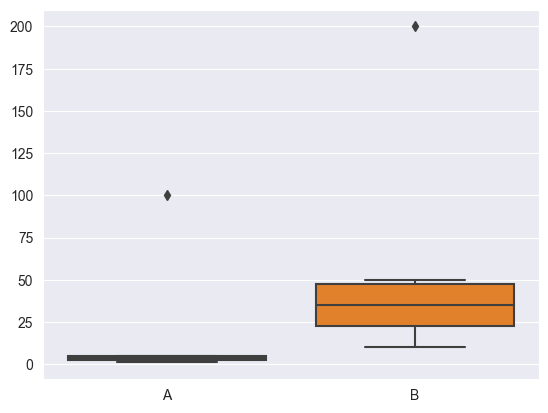

In [1]:
import pandas as pd
import seaborn as sns

# 创建一个示例数据帧
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 使用箱线图可视化异常值
sns.boxplot(data=df);

**异常值检测方法**： 可以使用统计方法（如 Z-分数、IQR 方法）、机器学习方法（如聚类和离群点检测算法）来检测异常值。一些库，如 scipy.stats 和   scikit-learn，提供了异常值检测的工具。

**处理异常值**： 一旦识别到异常值，你可以选择对其进行处理。处理方法包括删除异常值、替换为中位数或平均值、使用插值等。具体的处理方法取决于数据和分析需求。

以下是一个示例，演示如何使用 Z-分数方法来检测并替换异常值：

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# 创建示例数据帧
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 计算每列的 Z-分数
z_scores = np.abs(stats.zscore(df))
print(z_scores)

# 设置异常值阈值
threshold = 2

# 使用 Z-分数来识别和替换异常值  当z-score > threshold, 则认为是异常值
outliers = (z_scores > threshold).any(axis=1)
print('outliers:\n',outliers)
df_no_outliers = df[-outliers]

# 打印处理后的数据帧
print(df_no_outliers)

          A         B
0  0.502219  0.747532
1  0.474574  0.592870
2  0.446929  0.438208
3  0.419284  0.283547
4  0.391639  0.128885
5  2.234643  2.191042
outliers:
 0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
   A   B
0  1  10
1  2  20
2  3  30
3  4  40
4  5  50


使用Machine Learning算法处理异常值  
下面是使用**孤立森林算法**的例子 （isolation forest）  
predict 方法返回一个数组，其中 1 表示正常值，-1 表示异常值。

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# 创建示例数据帧，并为列指定名称
data = {'A': [1, 2, 3, 4, 5, 100], 'B': [10, 20, 30, 40, 50, 200]}
df = pd.DataFrame(data)

# 创建孤立森林模型
clf = IsolationForest(contamination=0.1)# contamination参数设置异常值的比例

# 拟合模型
clf.fit(df)

# 预测异常值
outliers = clf.predict(df)

# 打印异常值的位置
print(outliers)

[ 1  1  1  1  1 -1]


E:\Programming\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## Case 2: Star Wars Characters' Height
In humans, males are typically taller than females, but what about males and females in the Star Wars universe, which is inhabited by thousands of different species? Let's take a look in our dataset.

使用starwars.csv数据集进行异常值检测和处理

### 1. 总体分析
由于重点关注outliers，所有直接dropna()进行缺失值处理


In [10]:
starwars = pd.read_csv("E:\Programming\Dataset_prac\starwars(1).csv")
starwars=starwars.dropna()
starwars

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75,brown,light,blue,47BBY,female,Tatooine,Human
8,Biggs Darklighter,183.0,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human
10,Anakin Skywalker,188.0,84,blond,fair,blue,41.9BBY,male,Tatooine,Human
13,Han Solo,180.0,80,brown,fair,brown,29BBY,male,Corellia,Human
16,Wedge Antilles,170.0,77,brown,fair,hazel,21BBY,male,Corellia,Human


In [9]:
starwars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        28 non-null     object 
 1   height      28 non-null     float64
 2   mass        28 non-null     object 
 3   hair_color  28 non-null     object 
 4   skin_color  28 non-null     object 
 5   eye_color   28 non-null     object 
 6   birth_year  28 non-null     object 
 7   gender      28 non-null     object 
 8   homeworld   28 non-null     object 
 9   species     28 non-null     object 
dtypes: float64(1), object(9)
memory usage: 2.4+ KB


In [11]:
starwars.describe(include='all')

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
count,28,28.000000,28,28,28,28,28,28,28,28
unique,28,NaN,18,8,13,8,25,2,19,10
top,Luke Skywalker,NaN,80,none,fair,brown,19BBY,male,Tatooine,Human
freq,1,NaN,4,9,7,10,2,22,6,18
mean,NaN,176.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,20.716881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,170.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
starwars.gender.value_counts()

male      22
female     6
Name: gender, dtype: int64

In [14]:
starwars.height.describe()

count     28.000000
mean     176.178571
std       20.716881
min       88.000000
25%      170.000000
50%      179.000000
75%      188.000000
max      202.000000
Name: height, dtype: float64

可以看到总共28个角色（去除缺失值后），男性22个，女性6个。
身高均值176cm,最大值202cm，最小值88cm

## 2. 可视化分析


In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 2.1 直方图

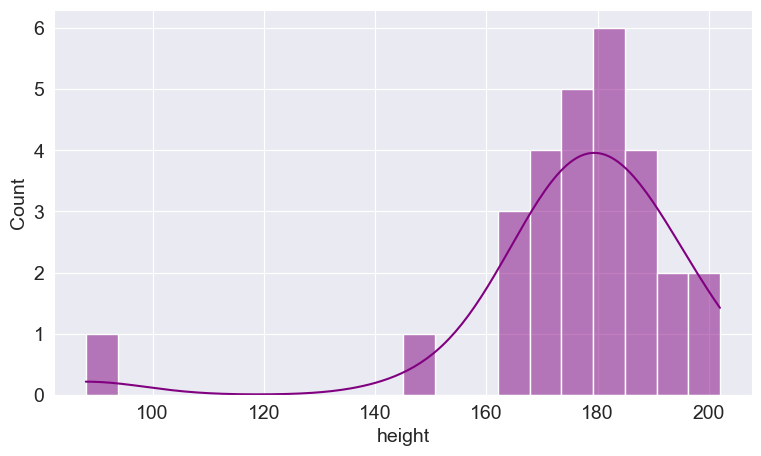

In [26]:
sns.histplot(starwars.height, bins=20, kde=True,color='purple');

### 2.2 箱线图
`outliers = boxplot_stats(starwars.height)[0]['fliers']`

[{'mean': 176.17857142857142,
  'iqr': 18.0,
  'cilo': 173.65936199637963,
  'cihi': 184.34063800362037,
  'whishi': 202.0,
  'whislo': 150.0,
  'fliers': array([88.]),
  'q1': 170.0,
  'med': 179.0,
  'q3': 188.0}]

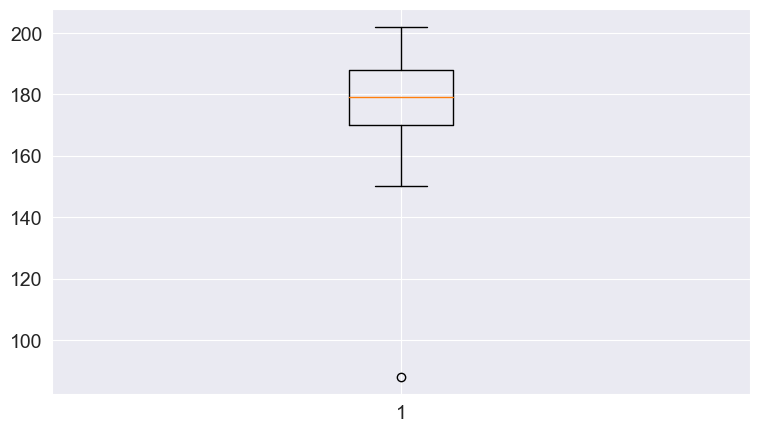

In [50]:
plt.boxplot(starwars.height);
from matplotlib.cbook import boxplot_stats  
box_info= boxplot_stats(starwars.height)
box_info # 其中stats表示上下限，iqr表示四分位距，fliers表示异常值（88）


#### 对Gender进行分组，查看男女性别的身高的箱线图

In [45]:
male_df=starwars[starwars.gender=='male']
female_df=starwars[starwars.gender=='female']
height_data=[male_df.height,female_df.height]

height_data

[0     172.0
 3     202.0
 5     178.0
 8     183.0
 9     182.0
 10    188.0
 13    180.0
 16    170.0
 19    170.0
 20    183.0
 22    190.0
 23    177.0
 24    175.0
 25    180.0
 28     88.0
 33    196.0
 41    175.0
 47    188.0
 48    198.0
 54    188.0
 63    193.0
 65    183.0
 Name: height, dtype: float64,
 4     150.0
 6     165.0
 43    178.0
 60    170.0
 61    166.0
 86    165.0
 Name: height, dtype: float64]

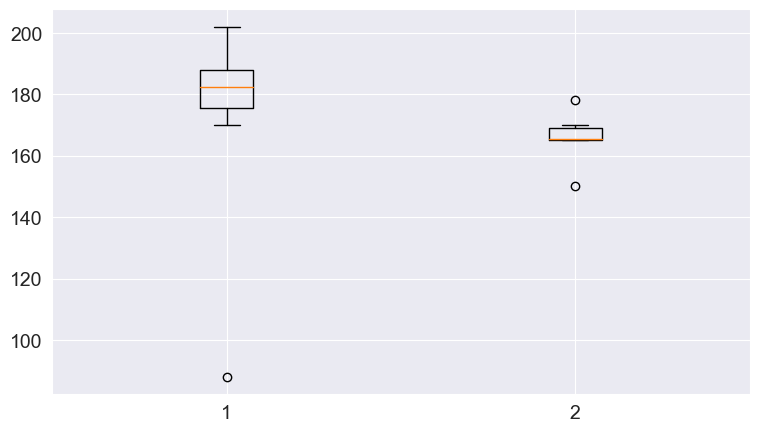

In [48]:
plt.boxplot(height_data);

### 2-3 Sigma Rule
- 68%的数据位于均值的一个标准差范围内：x.mean() +/- x.std()
- 95%的数据位于均值的两个标准差范围内: x.mean() +/- 2 * x.std()
- 99.7%的数据位于均值的三个标准差范围内: x.mean() +/- 3 * x.std()

即正常值应该大部分都位于均值的3个标准差范围内，如果有数据超出这个范围，就可以认为是异常值。


In [64]:
# Identify bounds
x= starwars['height']

higherBound= x.mean() + 3 * x.std()
lowerBound= x.mean() - 3 * x.std()
print (lowerBound,higherBound)

## Identify the rows with value greater than cutoff * sd 
starwars[(starwars['height'] > higherBound)|(starwars['height'] < lowerBound)] 

114.02792878545483 238.329214071688


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
28,Wicket Systri Warrick,88.0,20,brown,brown,brown,8BBY,male,Endor,Ewok


### Hample Identifier
Hample boundary是一种基于中位数和中位数绝对偏差（MAD）的异常值检测方法。它使用中位数和MAD来确定数据的正常范围.
当数据超出mad的3倍时均值，就认为是异常值。

即`x.median_abs_deviation() +/- 3 * x.std()`

In [65]:
# Identify bounds, note pandas.DataFrame.mad is deprecated since version 1.5.0
from scipy import stats

x= starwars['height']

higherBound= stats.median_abs_deviation(x) + 3 * x.std()
lowerBound= stats.median_abs_deviation(x) - 3 * x.std()
print (lowerBound,higherBound)

## Identify the rows with value greater than cutoff * sd 
starwars[(starwars['height'] > higherBound)|(starwars['height'] < lowerBound)] 

-53.15064264311658 71.15064264311658


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75,brown,light,blue,47BBY,female,Tatooine,Human
8,Biggs Darklighter,183.0,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human
10,Anakin Skywalker,188.0,84,blond,fair,blue,41.9BBY,male,Tatooine,Human
13,Han Solo,180.0,80,brown,fair,brown,29BBY,male,Corellia,Human
16,Wedge Antilles,170.0,77,brown,fair,hazel,21BBY,male,Corellia,Human


可以看到，使用Hample Identifier方法，上下边界不太靠谱。



# 3. Data Scaling and Normalization
- in scaling, you're changing the range of your data.
- in normalization, you're changing the shape of the distribution of your data.

## 1. Scaling
It means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like **support vector machines (SVM)** or **k-nearest neighbors (KNN)**. With these algorithms, a change of "1" in any numeric feature is given the same importance.\
## 2. Normalization
It is more radical than scaling, while scaling is only change the range of data, Normalization will make the data apply to the normal distribution.  

Scaling 侧重于调整数据的范围，以确保数据值在相似的尺度上，而 Normalization 侧重于确保数据的分布接近正态分布，以改善某些统计和机器学习算法的性能。


`StandardScaler` 进行数据标准化，这将使数据的均值为0，标准差为1。 

`MinMaxScaler` 用于将特征缩放到指定的范围，通常是[0, 1]。它通过缩放特征的范围来进行标准化。  

`RobustScaler` RobustScaler 是一种鲁棒的标准化方法，不受异常值的影响。它使用中位数和四分位距来进行标准化。

`stats.boxcox(data)` Box-Cox是一种使数据更接近正态分布的方法。它特别适用于具有正偏斜或负偏斜分布的数据，通过引入一个幂函数来调整数据的分布，使其更加对称。与StandardScaler只改变数据均值和方差而不改变分布形式不同，box-cox会使得数据更趋向于正态曲线的形状。

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
import numpy as np

data = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

std_scaler=StandardScaler()
d1 = std_scaler.fit_transform(data)
print('StandardScaler:\n',d1)

minmax_scaler=MinMaxScaler()
d2=minmax_scaler.fit_transform(data)
print('MinMaxScaler:\n',d2)

rob_scaler=RobustScaler()
d3=rob_scaler.fit_transform(data)
print('RobustScaler:\n',d3)


data_array = np.array(data)

# 分别对每个特征进行 Box-Cox 转换
# transformed_data = np.empty_like(data_array, dtype=float)
for i in range(data_array.shape[1]):
    transformed_data[:, i], lambda_value = stats.boxcox(data_array[:, i])

print(transformed_data)

StandardScaler:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
MinMaxScaler:
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]
RobustScaler:
 [[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]]
[[0.         0.89208537]
 [0.88891532 1.65361614]
 [1.64391667 2.34108893]
 [2.32328259 2.97826691]
 [2.95143046 3.57803422]]


# 4. Parsing Data 数据解析
"解析数据" 是指从原始数据中提取所需信息的过程。在数据科学和编程中，这通常涉及将原始数据转换为可操作的结构化格式，如列表、字典、DataFrame等，以便进一步分析和处理数据。解析数据是数据预处理的一部分，通常用于清洗、转换和准备数据以供分析或建模使用。

## 1. Binning
"Binning"（有时也称为 "bucketing"）是一种数据预处理技术，用于减少次要观测误差的影响，将连续变量转换为分类变量，或简化复杂的连续变量。在数据分析和机器学习中，binning 常用于数据清洗、预处理，以及提升模型的稳健性。

基本概念\
目的：通过将数据分组（分桶）来减少次要变异，从而简化模型。\
过程：将数据范围分割成一系列“桶”或“箱”，然后将每个数据点归入相应的桶中。

类型
等宽分箱（Equal-width binning）：\
将数据的范围分成具有相同宽度的区间。\
例如，将年龄分为0-20、21-40、41-60等。

等频分箱（Equal-frequency binning）：\
将数据分成包含相同数量数据点的区间。\
例如，将一组数据分成四个部分，每部分包含相同数量的数据点。

基于聚类的分箱：\
使用聚类算法（如 k-means）来确定最佳的分箱方式。\
每个“桶”代表一个聚类。


应用
数据可视化：在绘制柱状图或直方图时，binning 可以帮助更好地理解数据分布。\
数据模型：在训练机器学习模型时，binning 可以帮助处理连续变量，减少过拟合，提升模型的泛化能力。\
降噪：通过分组减少数据中的小波动和噪声

In [3]:
import pandas as pd

data = [15, 22, 24, 25, 35, 36, 40, 45, 55, 60]
bins = [0, 20, 40, 60]
labels = ['Youth', 'Young Adult', 'Senior']

data_bins=pd.cut(data, bins=bins, labels=labels)
data_bins

['Youth', 'Young Adult', 'Young Adult', 'Young Adult', 'Young Adult', 'Young Adult', 'Young Adult', 'Senior', 'Senior', 'Senior']
Categories (3, object): ['Youth' < 'Young Adult' < 'Senior']

## 2. DateTime type
使用 Pandas 的 pd.to_datetime 函数来将指定数据转换成`datetime`格式，方便直接进行时间相关的一些分析

`pd.to_datetime(data,format='',infer_datetime_format=T/F)` 设置infer_datetime_format后可以让pandas自动根据数据进行格式判断，但速度比直接设置format要慢很多。如果不设置format，该函数将按照默认格式（常见）进行解析。

当使用to_datetime进行解析后，可以对解析完成的datetime数据使用`.dt.day/month/year`进行访问单独的年月日。

In [46]:
import pandas as pd
import seaborn as sns

# 创建一个示例 DataFrame
data = {'date': ['2023-10-23', '2023-3-24', '2023-1-25']}
df = pd.DataFrame(data)
print(df,'\n')

# 将 "date" 列转换为 datetime 格式
df['parsed_date']=pd.to_datetime(df.date)

# 现在 "date" 列已经是 datetime 格式
print(df)
print(type(df.date)) #<class 'pandas.core.series.Series'>
print(df.parsed_date.dtype)  #datetime64[ns]

#使用.dt方法进行访问
print('Day:\n',df['parsed_date'].dt.day)
print('Month:\n',df['parsed_date'].dt.month)



         date
0  2023-10-23
1   2023-3-24
2   2023-1-25 

         date parsed_date
0  2023-10-23  2023-10-23
1   2023-3-24  2023-03-24
2   2023-1-25  2023-01-25
<class 'pandas.core.series.Series'>
datetime64[ns]
Day:
 0    23
1    24
2    25
Name: parsed_date, dtype: int64
Month:
 0    10
1     3
2     1
Name: parsed_date, dtype: int64


## 3. 文本数据进行字符串处理（对于整个series作用）
对于inconsistent text, 一般处理步骤为：  
统一大小写`.str.lower()/upper()` --> 去除空格 `.str.strip()`  --> 模糊匹配 fuzzy matching

**`.str`** 是 Pandas 中的一个强大属性，用于对 Series 中的文本数据进行各种字符串操作和方法调用。.str.len()方法可以应用于Series中的每个元素，确保在处理文本数据时具有一致的行为。 使用方法：先提取dataframe中的一列，对该列进行.str操作

以下是一些常见的 .str 方法和使用示例：


### 字符串长度：`.str.len()`

In [47]:
data = {'Name': ['Alice', 'Bob', 'Charlie']}
df = pd.DataFrame(data)
name_series = df['Name']

name_lengths = name_series.str.len()
print(name_lengths)


0    5
1    3
2    7
Name: Name, dtype: int64


### 字符串拆分：`.str.split()`
参数设置：
- n：指定拆分的次数，如果不指定，则拆分所有字符串；若设置为1，则在遇见第一个分隔符时停止拆分。
- expand：是否将拆分后的字符串扩展为独立的一列，如果为True，则扩展为独立的一列，如果为False，则保持原来的格式。

In [48]:
text = "apple,banana,cherry"
fruits = pd.Series([text])
fruit_list = fruits.str.split(',')
print(fruit_list)


0    [apple, banana, cherry]
dtype: object


### 字符串去除空格：`.str.strip()` 去除两侧空格

In [57]:
text = "       This is a sentence with leading and trailing  "
sentence = pd.Series([text])
trimmed_sentence = sentence.str.strip()
print(trimmed_sentence)

0    This is a sentence with leading and trailing
dtype: object


### 字符串替换：`.str.replace('ori_str','new_str')`  使用空字符可以将内部空格去除

In [60]:
text = "I like apples and apples are good."
sentence = pd.Series([text])
new_sentence = sentence.str.replace('apples', 'bananas')
print(new_sentence)

import pandas as pd

data = {'Text': ['This is an example', 'Remove   extra   spaces', '  Keep  single  spaces ']}
df = pd.DataFrame(data)
text_series = df['Text']

# 使用 .str.replace() 去除内部空格
text_no_spaces = text_series.str.replace(' ', '')
print(text_no_spaces)


0    I like bananas and bananas are good.
dtype: object
0      Thisisanexample
1    Removeextraspaces
2     Keepsinglespaces
Name: Text, dtype: object


### 字符串提取：`.str.extract()` 按照正则式提取字符串

In [58]:
text = "My phone number is 555-123-4567."
sentence = pd.Series([text])
phone_numbers = sentence.str.extract(r'(\d{3}-\d{3}-\d{4})')
print(phone_numbers)


              0
0  555-123-4567


### 字符串大小写转换：`.str.upper()/lower()`

In [50]:
names = pd.Series(['Alice', 'Bob', 'Charlie'])
uppercase_names = names.str.upper()
lowercase_names = names.str.lower()

print(uppercase_names,lowercase_names)

0      ALICE
1        BOB
2    CHARLIE
dtype: object 0      alice
1        bob
2    charlie
dtype: object


### Fuzzy matching:  `.fuzzywuzzy.process.extract('query_str', 'ori_str', limit=, scorer=)`
The process of automatically finding text strings that are very similar to the target string. \
limit: 表示找出前多少个与目标query相似的str；  
scorer: 使用不同得分进行相似度判断；

**fuzz.ratio**：\
fuzz.ratio 函数用于计算两个字符串之间的相似性分数，它将两个字符串视为一个整体进行比较。\
这个函数比较字符串的所有字符，包括它们的顺序，以确定相似性。\
fuzz.ratio 适用于字符串完全匹配的情况，或者当你关心字符串的整体相似性时。

**fuzz.token_sort_ratio**：\
fuzz.token_sort_ratio 函数也用于计算字符串之间的相似性分数，但它在比较前会先对字符串中的单词进行排序。\
这个函数会将字符串分割成单词，并对这些单词进行排序，然后再进行相似性比较。\
fuzz.token_sort_ratio 更适合处理单词顺序不同但单词内容相似的情况。例如，它可以用于处理**两个句子的相似性**，即使单词的顺序不同，也能得到合理的匹配。

In [9]:
## 注意使用jupyter notebook， pip前面要加！
# !pip install fuzzywuzzy
# !pip install python-Levenshtein  安装这个库用于提升字符串比较性能和速度

# fuzz用于比较两个字符串相似度
from fuzzywuzzy import fuzz


string1 = "apple banana cherry"
string2 = "banana cherry apple"

# 使用 fuzz.ratio 比较字符串相似性
ratio1 = fuzz.ratio(string1, string2)
print("fuzz.ratio:", ratio1)

# 使用 fuzz.token_sort_ratio 比较字符串相似性
ratio2 = fuzz.token_sort_ratio(string1, string2)
print("fuzz.token_sort_ratio:", ratio2)


fuzz.ratio: 68
fuzz.token_sort_ratio: 100


In [16]:
# 用process.extract（）找出一系列字符串中与目标字符串相似度最高的
from fuzzywuzzy import process

choices = ["apple", "banana", "pplea", 'appppple',"date"]

result = process.extract('apple', choices, scorer=fuzz.ratio, limit=4)
print(result)

result = process.extract('apple', choices, scorer=fuzz.token_sort_ratio, limit=4)
print(result)

# 注意 fuzz.token_sort_ratio 一般用于比较两个句子的相似度。



[('apple', 100), ('pplea', 80), ('appppple', 77), ('date', 44)]
[('apple', 100), ('pplea', 80), ('appppple', 77), ('date', 44)]


# 5. Character Encodings

encode:将二进制字符转换为各种人类能看懂的字符；  
decode：转换成二进制字符  

Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi").   

When we use a different encoding to encode the string, it may cause some lost and when decoding, we cannot find it back.

In [16]:
before = "This is the euro symbol: €"
print(before,type(before))

after=before.encode('utf-8')
print(after,type(after))

decode_after=after.decode('utf-8')
print(decode_after,type(decode_after))


# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")
print('\n',after,type(after))

# convert it back to utf-8
print(after.decode("ascii"))


This is the euro symbol: € <class 'str'>
b'This is the euro symbol: \xe2\x82\xac' <class 'bytes'>
This is the euro symbol: € <class 'str'>

 b'This is the euro symbol: ?' <class 'bytes'>
This is the euro symbol: ?


When we open a file and it turns out to be wrong with encoding problems, we can then use some tools to get the right encoding.  

`detect(data)` from charset_normalizer import detect, this function can detect the encoding without open the whole file.\
注意，如果只输入前10000行给detect进行编码格式猜测可能会得到错误encoding， 此时可以输入更多行来进行猜测

In [32]:
from charset_normalizer import detect

# 打开文件并读取前 10000 字节
with open('E:\Programming\Dataset_prac\encoding_test.txt', 'rb') as file:  # rb 表示只读（r）且二进制（b）
    data = file.read(10000)  # 前10000行存入data

# 使用 charset_normalizer.detect() 检测字符编码
encoding = detect(data)
# 打印检测到的字符编码
print("Detected Encoding:", encoding)  # confidence表示认为100%为utf-8编码

# 使用检测到的字符编码解码文本数据
decoded_text = data.decode('utf-8')
# 打印解码后的文本
print('\nutf-8 decode:\n',decoded_text)


Detected Encoding: {'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}

utf-8 decode:
 This is a sample text file.
这是一个示例文本文件。
Ceci est un fichier texte d'exemple.
これはサンプルテキストファイルです。
Esto es un archivo de texto de muestra.
